In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
data = pd.read_csv('data.csv')

# EDA

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### ocean_proximity count

<AxesSubplot:ylabel='ocean_proximity'>

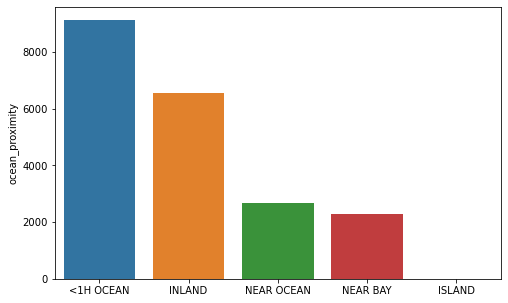

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(x=['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], y=data['ocean_proximity'].value_counts(), data=data)

([<matplotlib.patches.Wedge at 0x21a7f7e0d60>,
 [Text(0.19716564197898398, 1.0821856169913806, '<1H OCEAN'),
  Text(-0.8844748613710405, -0.6539909935180139, 'INLAND'),
  Text(0.4958059239440402, -0.9819248880550879, 'NEAR OCEAN'),
  Text(1.033279604741086, -0.3772708025094247, 'NEAR BAY'),
  Text(1.0999996814845978, -0.0008370984311453185, 'ISLAND')],
 [Text(0.10754489562490034, 0.5902830638134803, '44.3%'),
  Text(-0.4824408334751129, -0.3567223601007348, '31.7%'),
  Text(0.27043959487856734, -0.5355953934845934, '12.9%'),
  Text(0.5636070571315014, -0.2057840740960498, '11.1%'),
  Text(0.599999826264326, -0.0004565991442610828, '0.0%')])

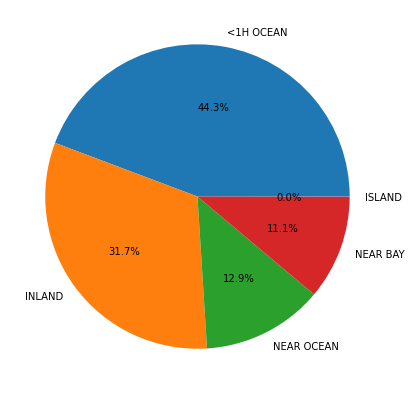

In [6]:
plt.figure(figsize=(10,7))
plt.pie(x=data['ocean_proximity'].value_counts(), labels=['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], autopct='%1.1f%%')

### Where are the most populated areas?
#### population density recongnition

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

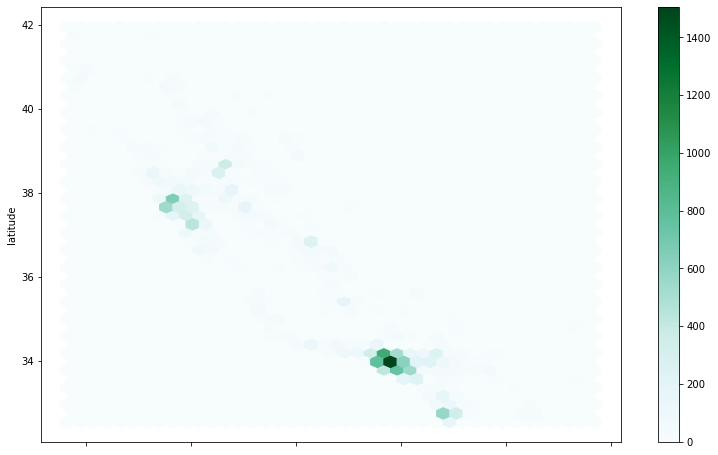

In [7]:
data.plot(kind='hexbin', x='longitude', y='latitude',gridsize=40, figsize=(13,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

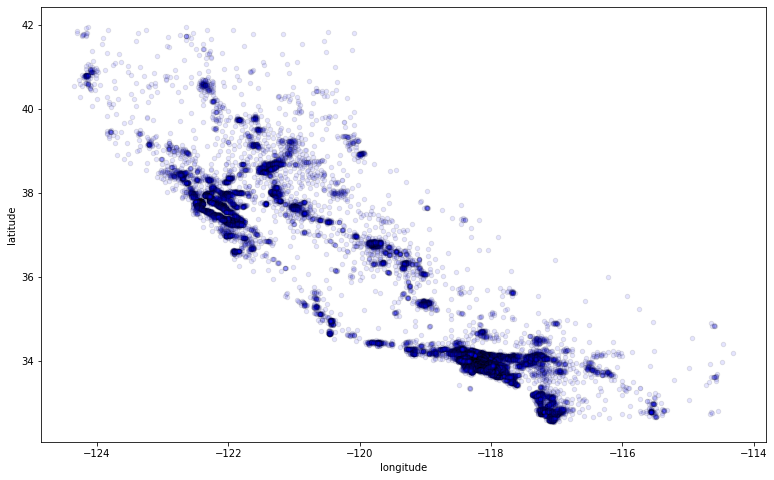

In [8]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, c='blue', edgecolor='black', figsize=(13,8))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

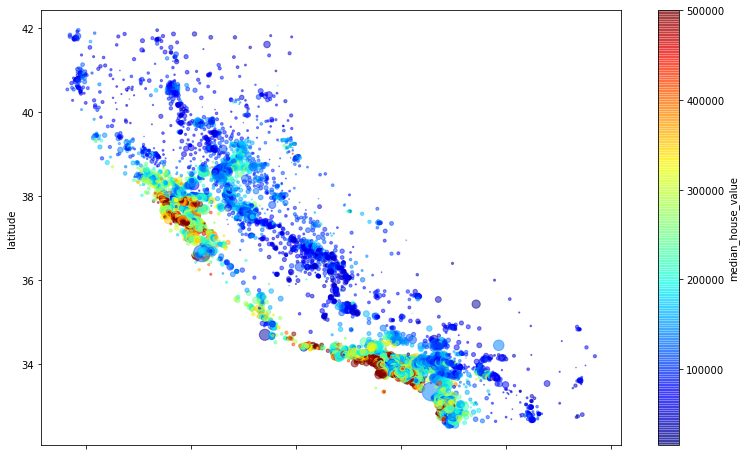

In [9]:
data.plot(kind='scatter', x='longitude', y='latitude',
             alpha=0.5, s=data['population']/100,
             c='median_house_value', cmap=plt.get_cmap('jet'),
             figsize=(13,8))

### Correlations

In [10]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [11]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

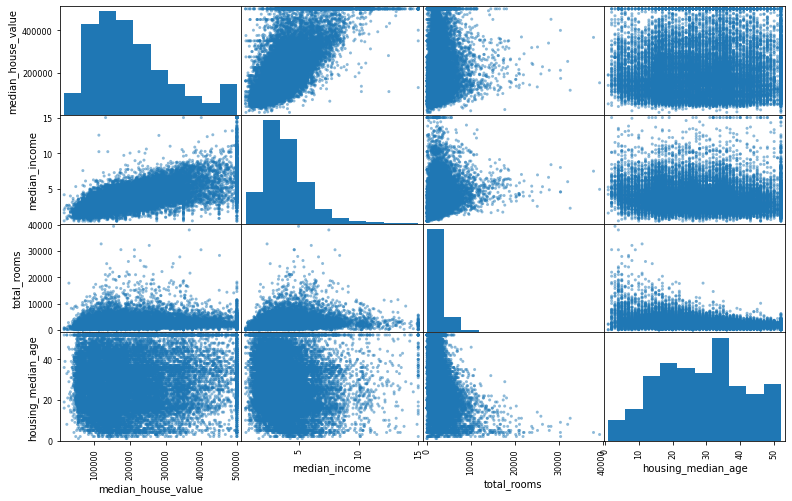

In [12]:
pd.plotting.scatter_matrix(data[attributes], figsize=(13,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

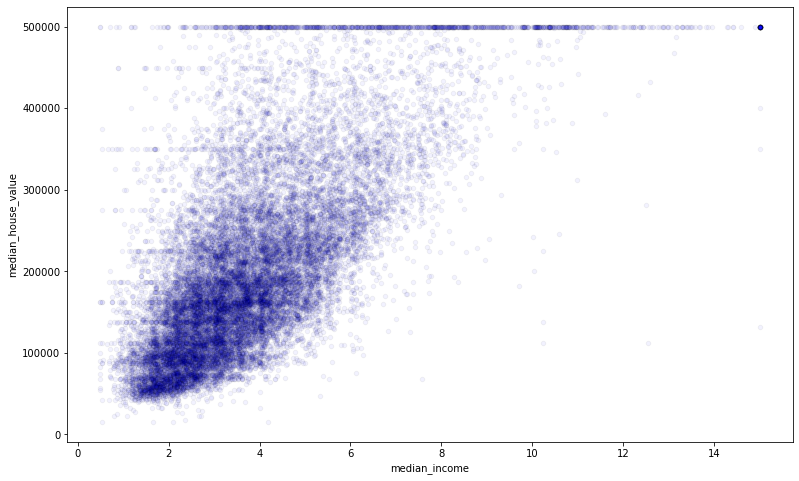

In [13]:
data.plot(kind='scatter', x='median_income', y='median_house_value', edgecolor='black', c='blue', alpha=0.05, figsize=(13,8))

### Distribution of features

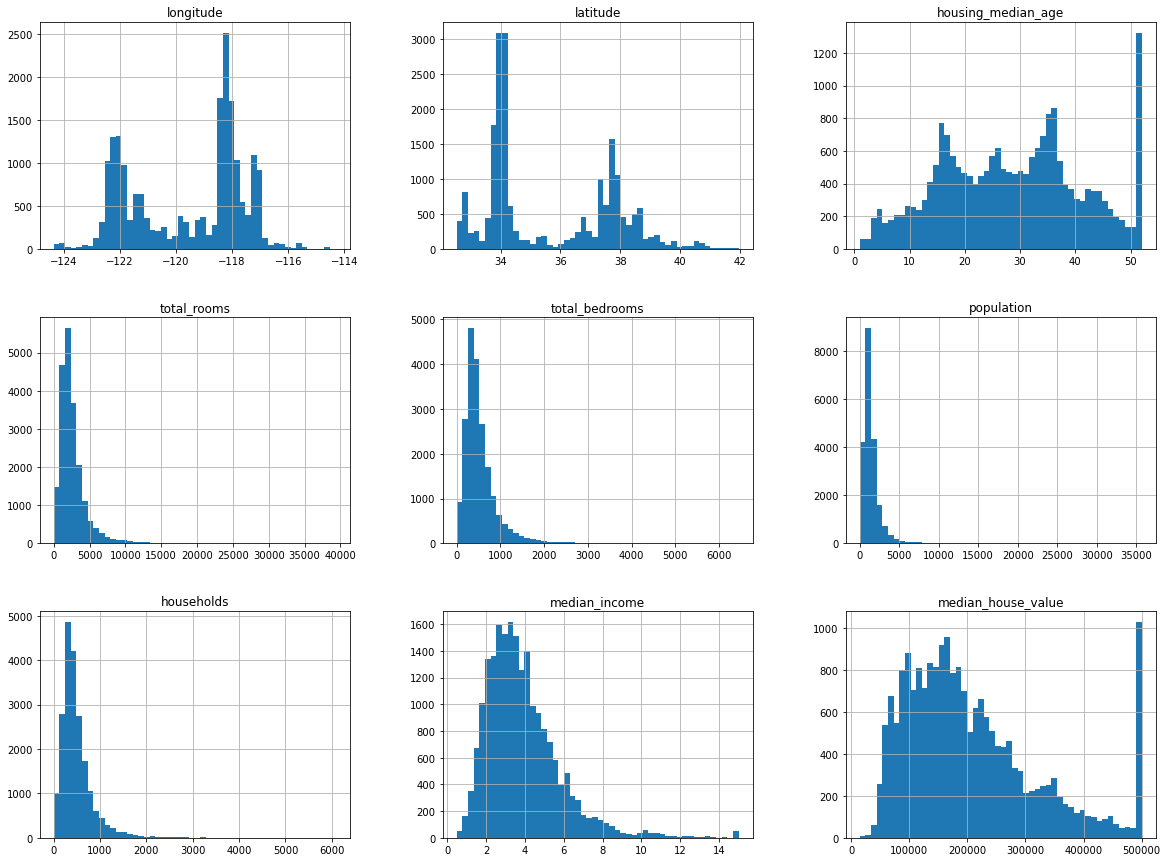

In [14]:
ax = data.hist(bins=50, figsize=(20,15))

### Better intuition for outliers

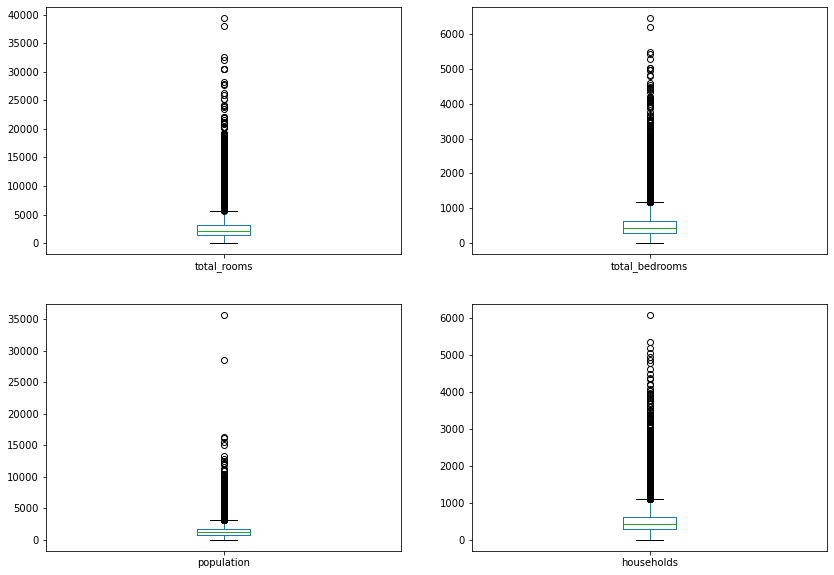

In [15]:
# because we have varied scales, we put each box in a distinct plot 
plt.figure(figsize=(14,10))

n = 0
for c in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    n += 1
    plt.subplot(2, 2, n)
    data.boxplot(column=[c],grid=False)

### Preprocessing

In [ ]:
# Outlier Handling
# population
indices = data[data.loc[:,'population'] > 4700].index
data.loc[indices,'population'] = 4700

# total_rooms
indices = data[data.loc[:,'total_rooms'] > 8000].index
data.loc[indices,'total_rooms'] = 8000

# total_bedrooms
indices = data[data.loc[:,'total_bedrooms'] > 1700].index
data.loc[indices,'total_bedrooms'] = 1700

# households
indices = data[data.loc[:,'households'] > 2000].index
data.loc[indices,'households'] = 2000

# Imputing
data_cat = data['ocean_proximity']
data_num = data.drop('ocean_proximity', axis=1)

imputer = SimpleImputer(strategy='median')
imputer.fit(data_num)
num_data = imputer.transform(data_num)
data_num = pd.DataFrame(num_data, columns=data_num.columns, index=data_num.index)

# New Features and New Correlations
data['rooms_per_household'] = data['total_rooms']/data['households']
data['bedrooms_per_room'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']


# One-Hot Encoding
encoder = LabelBinarizer()

data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.Series(data_cat_encoded.tolist())

data = pd.concat([data_cat_encoded, data_num], axis=1)

data = data.rename(columns={0: 'ocean_proximity'})

data['op_0'] = [e[0] for e in data['ocean_proximity']]
#data['op_1'] = [e[1] for e in data['ocean_proximity']] # Not important, based on feature importance
#data['op_2'] = [e[2] for e in data['ocean_proximity']]
#data['op_3'] = [e[3] for e in data['ocean_proximity']]
#data['op_4'] = [e[4] for e in data['ocean_proximity']]

data = data.drop(['ocean_proximity'], axis=1)

# Spliting
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

# Seprating Labels from Features
# Train Set
y_train = train_set['median_house_value'] #Labels
x_train = train_set.drop('median_house_value', axis=1) #Features
# Test Set
y_test = test_set['median_house_value'] #Labels
X_test = test_set.drop('median_house_value', axis=1) #Features

# Scaling
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns, index=X_test.index)

### Check outliers again

In [ ]:
plt.figure(figsize=(14,10))

n = 0
for c in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    n += 1
    plt.subplot(2, 2, n)
    data.boxplot(column=[c])

### Check distributions again

In [ ]:
data.hist(bins=50, figsize=(20,15))

### New features & New correlations

In [ ]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

# Training

### Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_predictions = lin_reg.predict(x_train)

In [ ]:
some_data = x_train.iloc[:5]
some_labels = y_train.iloc[:5]

In [ ]:
lin_reg.predict(some_data)

In [ ]:
some_labels

In [ ]:
lin_rmse = np.sqrt(mean_squared_error(y_train, lin_predictions))
lin_rmse

### Decision Tree

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)
tree_predictions = tree_reg.predict(x_train)

In [ ]:
tree_rmse = np.sqrt(mean_squared_error(y_train, tree_predictions))
tree_rmse

* DecisionTree overfits our data, so we split our data into 10 distinct subsets (folds). In this way our model picks 1 subset for evaluation and 9 subsets for training

#### Cross-Validation

In [ ]:
scores = cross_val_score(tree_reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [ ]:
tree_rmse = np.sqrt(-scores)
(tree_rmse, tree_rmse.mean())

### RandomForest

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)
rf_predictions = forest_reg.predict(x_train)

In [ ]:
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_predictions))
rf_rmse

### Support Vector Machine

In [ ]:
svm_reg = SVR(kernel='linear')
svm_reg.fit(x_train, y_train)
svm_predictions = svm_reg.predict(x_train)

In [ ]:
svm_rmse = np.sqrt(mean_squared_error(y_train, svm_predictions))
svm_rmse

# Tuning

#### Random Search + Cross Validation

* Takes about 10 minutes or more

In [ ]:
param_distribs = {
        'n_estimators': randint(low=10, high=200),
        'max_features': randint(low=1, high=12),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(x_train, y_train)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

#### Grid Search + Cross Validation

In [ ]:
param_grid = [
    {'n_estimators': [90, 100, 120], 'max_features': [5, 8, 10]},
    #{'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [6, 8]},
  ]

forest_reg = RandomForestRegressor(random_state=1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train, y_train)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
grid_search.best_params_

# Test Set

In [ ]:
final_model = RandomForestRegressor(max_features=5, n_estimators=120)
final_model.fit(x_train, y_train)
predictions = final_model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [ ]:
feature_importances

In [ ]:
attributes = data
sorted(zip(feature_importances, attributes), reverse=True)